Importing the dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_credit = pd.read_csv(r'C:\Users\Gian\Documents\Coding\ML_Basics\Naive_Bayes\credit_risk_dataset.csv')

In [4]:
df_credit.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df_credit[df_credit['person_age'] < 0]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


In [7]:
df_credit.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

<AxesSubplot:>

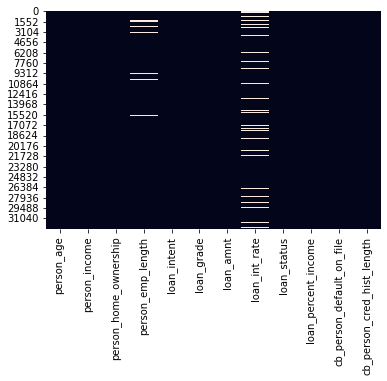

In [8]:
sns.heatmap(df_credit.isnull(), cbar=False)


The total of null data represents about 10% of the whole dataset, so it's ok to delete it

In [9]:
df_credit.dropna(axis=1,inplace=True)

Checking correlations in the dataset

<AxesSubplot:>

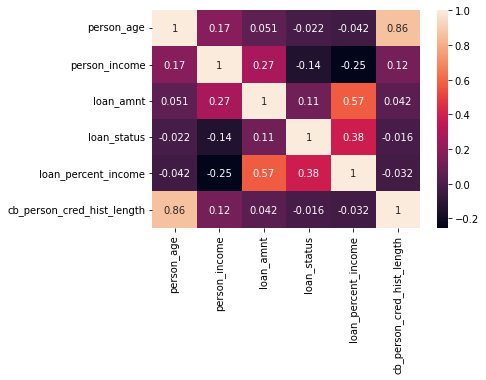

In [10]:
sns.heatmap(df_credit.corr(), annot=True)

In [11]:
df_credit.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Checking the values of certain columns for labelling

In [12]:
values_unique = ['person_home_ownership','loan_intent','loan_grade', 'cb_person_default_on_file']

for i in range(0,3):
    print(df_credit[values_unique[i]].value_counts())

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64


In [13]:
df_credit[values_unique].nunique()

person_home_ownership        4
loan_intent                  6
loan_grade                   7
cb_person_default_on_file    2
dtype: int64

Labelling the columns with only 2 values with binary and the other ones with LabelEncoder 

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_credit.drop('loan_status', axis=1),df_credit['loan_status'], test_size=0.3)

In [17]:
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [18]:
encoding_pipeline = Pipeline([
('encode_unique_more2', ce.OrdinalEncoder(cols=['person_home_ownership', 'loan_intent', 'loan_grade'], return_df=True)),
('encode_unique_binary', ce.BaseNEncoder(cols=['cb_person_default_on_file'], return_df=True))
])





X_train = encoding_pipeline.fit_transform(X_train)
X_test = encoding_pipeline.fit_transform(X_test)

X_test

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file_0,cb_person_default_on_file_1,cb_person_cred_hist_length
24649,35,75000,1,4,2,9000,0.12,0,1,9
1308,22,25992,4,4,1,3000,0.12,0,1,3
30983,39,72000,1,4,1,15000,0.21,0,1,15
5910,24,47211,3,3,1,10000,0.21,0,1,3
4519,26,72000,2,6,1,4800,0.07,0,1,3
...,...,...,...,...,...,...,...,...,...,...
2061,23,30000,1,3,1,5000,0.17,0,1,4
19418,33,38000,2,2,3,3000,0.08,1,0,10
11344,24,67524,1,2,1,10000,0.15,0,1,2
2479,22,32352,1,6,3,1000,0.03,1,0,2


In [19]:
X_train

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file_0,cb_person_default_on_file_1,cb_person_cred_hist_length
13505,26,92700,1,1,1,1500,0.02,0,1,2
14974,22,44172,2,2,1,15000,0.34,0,1,3
12487,24,82000,1,3,1,5325,0.06,0,1,3
9887,23,45000,2,1,1,9000,0.20,0,1,2
12147,22,74000,1,1,2,4000,0.05,0,1,3
...,...,...,...,...,...,...,...,...,...,...
7825,24,55000,1,2,1,3100,0.06,0,1,2
12914,25,78500,2,5,1,12000,0.15,0,1,2
23101,29,60000,1,1,1,2400,0.04,0,1,9
28741,27,60000,2,3,3,10000,0.17,0,1,7


In [20]:
col_names = ['person_income', 'person_age', 'loan_amnt']

def standardize(dataset):
    features = dataset[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    dataset[col_names] = features
    return dataset

In [21]:
X_train_std = standardize(X_train)
X_test_std = standardize(X_test)

In [22]:
X_test_std

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file_0,cb_person_default_on_file_1,cb_person_cred_hist_length
24649,1.163590,0.160074,1,4,2,-0.090342,0.12,0,1,9
1308,-0.910431,-0.735947,4,4,1,-1.042002,0.12,0,1,3
30983,1.801750,0.105225,1,4,1,0.861317,0.21,0,1,15
5910,-0.591351,-0.347996,3,3,1,0.068268,0.21,0,1,3
4519,-0.272271,0.105225,2,6,1,-0.756504,0.07,0,1,3
...,...,...,...,...,...,...,...,...,...,...
2061,-0.750891,-0.662668,1,3,1,-0.724782,0.17,0,1,4
19418,0.844510,-0.516403,2,2,3,-1.042002,0.08,1,0,10
11344,-0.591351,0.023389,1,2,1,0.068268,0.15,0,1,2
2479,-0.910431,-0.619666,1,6,3,-1.359222,0.03,1,0,2


In [23]:
X_train_std

,person_age,person_income,person_home_ownership,loan_intent,loan_grade,loan_amnt,loan_percent_income,cb_person_default_on_file_0,cb_person_default_on_file_1,cb_person_cred_hist_length
13505,-0.273680,0.411655,1,1,1,-1.279416,0.02,0,1,2
14974,-0.900452,-0.336597,2,2,1,0.853510,0.34,0,1,3
12487,-0.587066,0.246672,1,3,1,-0.675087,0.06,0,1,3
9887,-0.743759,-0.323830,2,1,1,-0.094457,0.20,0,1,2
12147,-0.900452,0.123320,1,1,2,-0.884429,0.05,0,1,3
...,...,...,...,...,...,...,...,...,...,...
7825,-0.587066,-0.169640,1,2,1,-1.026624,0.06,0,1,2
12914,-0.430373,0.192706,2,5,1,0.379526,0.15,0,1,2
23101,0.196399,-0.092545,1,1,1,-1.137221,0.04,0,1,9
28741,-0.116987,-0.092545,2,3,3,0.063537,0.17,0,1,7


Training the model

In [24]:
from sklearn.svm import SVC

In [25]:
svclassifier = SVC()
svclassifier.fit(X_train, y_train)

SVC()

In [26]:
y_pred = svclassifier.predict(X_test)

Evaluating the model

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[7483  166]
 [1455  671]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      7649
           1       0.80      0.32      0.45      2126

    accuracy                           0.83      9775
   macro avg       0.82      0.65      0.68      9775
weighted avg       0.83      0.83      0.80      9775

